# Wildfire Prediction with Logistic Regression


Baseline Random Forest
Train accuracy: 1.0000
Test accuracy:  0.8400

Hyperparameter Tuning for Random Forest

Top 10 Results
1. Estimators:  50, Depth: None , Leaf:  5, Train: 0.9351, Test: 0.8600
2. Estimators:  50, Depth: 5    , Leaf:  1, Train: 0.9805, Test: 0.8600
3. Estimators:  50, Depth: 5    , Leaf:  5, Train: 0.9416, Test: 0.8600
4. Estimators:  50, Depth: 10   , Leaf:  5, Train: 0.9351, Test: 0.8600
5. Estimators:  50, Depth: 20   , Leaf:  5, Train: 0.9351, Test: 0.8600
6. Estimators:  50, Depth: 50   , Leaf:  5, Train: 0.9351, Test: 0.8600
7. Estimators: 100, Depth: None , Leaf:  5, Train: 0.9481, Test: 0.8600
8. Estimators: 100, Depth: 5    , Leaf:  1, Train: 0.9870, Test: 0.8600
9. Estimators: 100, Depth: 5    , Leaf:  5, Train: 0.9481, Test: 0.8600
10. Estimators: 100, Depth: 10   , Leaf:  5, Train: 0.9481, Test: 0.8600

Best Hyperparameters
n_estimators: 50
max_depth: None
min_samples_leaf: 5
Train accuracy: 0.9351
Test accuracy:  0.8600


<Figure size 600x500 with 0 Axes>

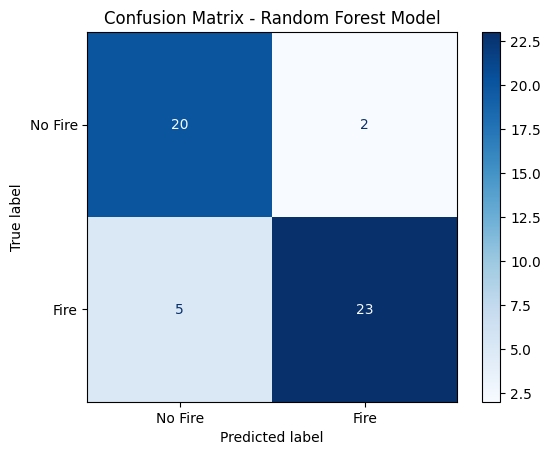

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# File paths
TRAINING_FILE = "wildfires_training.csv"
TEST_FILE = "wildfires_test.csv"

# Load data
train = pd.read_csv(TRAINING_FILE)
test = pd.read_csv(TEST_FILE)

# Separate features and labels
X_train = train.drop(columns=["fire"])
y_train = train["fire"].map({"yes": 1, "no": 0})

X_test = test.drop(columns=["fire"])
y_test = test["fire"].map({"yes": 1, "no": 0})

# Scale features (optional for RandomForest, kept for consistency)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Baseline model
print("Baseline Random Forest")
baseline = RandomForestClassifier(random_state=42)
baseline.fit(X_train, y_train)

train_acc = accuracy_score(y_train, baseline.predict(X_train))
test_acc = accuracy_score(y_test, baseline.predict(X_test))

print(f"Train accuracy: {train_acc:.4f}")
print(f"Test accuracy:  {test_acc:.4f}")

# Manual grid search
n_estimators_list = [10, 50, 100, 200]
max_depth_list = [None, 5, 10, 20, 50]
min_samples_leaf_list = [1, 5, 10, 20]

results = []
best_test_acc = 0
best_params = {}

print("\nHyperparameter Tuning for Random Forest")

for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        for min_samples_leaf in min_samples_leaf_list:
            model = RandomForestClassifier(
                n_estimators=n_estimators,
                max_depth=max_depth,
                min_samples_leaf=min_samples_leaf,
                random_state=42
            )
            model.fit(X_train, y_train)

            train_pred = model.predict(X_train)
            test_pred = model.predict(X_test)

            train_acc = accuracy_score(y_train, train_pred)
            test_acc = accuracy_score(y_test, test_pred)

            results.append((n_estimators, max_depth, min_samples_leaf, train_acc, test_acc))

            if test_acc > best_test_acc:
                best_test_acc = test_acc
                best_params = {
                    "n_estimators": n_estimators,
                    "max_depth": max_depth,
                    "min_samples_leaf": min_samples_leaf,
                    "train_acc": train_acc,
                    "test_acc": test_acc
                }

# Sort results by test accuracy
results.sort(key=lambda x: x[4], reverse=True)

print("\nTop 10 Results")
for i, (n, d, leaf, tr_acc, te_acc) in enumerate(results[:10], 1):
    print(f"{i}. Estimators: {n:3}, Depth: {str(d):5}, Leaf: {leaf:2}, "
          f"Train: {tr_acc:.4f}, Test: {te_acc:.4f}")

print("\nBest Hyperparameters")
print(f"n_estimators: {best_params['n_estimators']}")
print(f"max_depth: {best_params['max_depth']}")
print(f"min_samples_leaf: {best_params['min_samples_leaf']}")
print(f"Train accuracy: {best_params['train_acc']:.4f}")
print(f"Test accuracy:  {best_params['test_acc']:.4f}")

# Train final model using best parameters
final_model = RandomForestClassifier(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    min_samples_leaf=best_params["min_samples_leaf"],
    random_state=42
)
final_model.fit(X_train, y_train)
y_pred_final = final_model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Fire", "Fire"])

plt.figure(figsize=(6, 5))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Random Forest Model")
plt.show()



Baseline Logistic Regression
Train accuracy: 0.8961
Test accuracy:  0.8600

Top 10 Results
1. Penalty: l2  , C:    5000, Train: 0.9221, Test: 0.9000
2. Penalty: l2  , C:   10000, Train: 0.9221, Test: 0.9000
3. Penalty: none, C:     1.0, Train: 0.9286, Test: 0.9000
4. Penalty: l2  , C:     100, Train: 0.9221, Test: 0.8800
5. Penalty: l2  , C:     200, Train: 0.9286, Test: 0.8800

Best Hyperparameters
Penalty: l2
C: 5000
Train accuracy: 0.9221
Test accuracy:  0.9000


<Figure size 600x500 with 0 Axes>

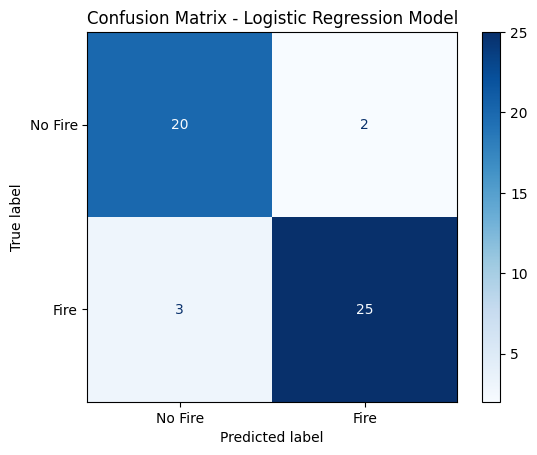

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# File paths
TRAINING_FILE = "wildfires_training.csv"
TEST_FILE = "wildfires_test.csv"

# Load data
train = pd.read_csv(TRAINING_FILE)
test = pd.read_csv(TEST_FILE)

# Separate features and labels
X_train = train.drop(columns=["fire"])
y_train = train["fire"].map({"yes": 1, "no": 0})

X_test = test.drop(columns=["fire"])
y_test = test["fire"].map({"yes": 1, "no": 0})

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Baseline model
print("Baseline Logistic Regression")
baseline = LogisticRegression(max_iter=1000, random_state=42)
baseline.fit(X_train, y_train)

train_acc = accuracy_score(y_train, baseline.predict(X_train))
test_acc = accuracy_score(y_test, baseline.predict(X_test))

print(f"Train accuracy: {train_acc:.4f}")
print(f"Test accuracy:  {test_acc:.4f}")

# Manual grid search
C_values = [0.01, 0.1, 1, 10, 100, 200, 500, 750, 1000, 1500, 2000, 5000, 10000]
penalties = ["l2", None]

results = []
best_test_acc = 0
best_params = {}

for penalty in penalties:
    if penalty is None:
        C_list = [1.0]
    else:
        C_list = C_values
    
    for C in C_list:
        model = LogisticRegression(penalty=penalty, C=C, max_iter=2000, random_state=42)
        model.fit(X_train, y_train)
        
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        train_acc = accuracy_score(y_train, train_pred)
        test_acc = accuracy_score(y_test, test_pred)
        
        pen_name = penalty if penalty else "none"
        results.append((pen_name, C, train_acc, test_acc))
        
        if test_acc > best_test_acc:
            best_test_acc = test_acc
            best_params = {
                "penalty": pen_name,
                "C": C,
                "train_acc": train_acc,
                "test_acc": test_acc
            }

results.sort(key=lambda x: x[3], reverse=True)

print("\nTop 10 Results")
for i, (pen, C, tr_acc, te_acc) in enumerate(results[:5], 1):
    print(f"{i}. Penalty: {pen:4s}, C: {C:7}, Train: {tr_acc:.4f}, Test: {te_acc:.4f}")

print("\nBest Hyperparameters")
print(f"Penalty: {best_params['penalty']}")
print(f"C: {best_params['C']}")
print(f"Train accuracy: {best_params['train_acc']:.4f}")
print(f"Test accuracy:  {best_params['test_acc']:.4f}")

# --- Confusion Matrix for Final Model ---
final_model = LogisticRegression(
    penalty=best_params["penalty"] if best_params["penalty"] != "none" else None,
    C=best_params["C"],
    max_iter=2000,
    random_state=42
)
final_model.fit(X_train, y_train)
y_pred_final = final_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Fire", "Fire"])

plt.figure(figsize=(6, 5))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Logistic Regression Model")
plt.show()
